In [1]:
# Run this cell if you are using Google Colab
%%capture
! pip install arviz==0.11.00
! pip install pymc3==3.11.1

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymc3 as pm
import seaborn as sns
from scipy import stats

sns.set_context('talk')

# Generalized linear model

## Logistic regression

### Data

In [3]:
iris = pd.read_csv("https://github.com/LegrandNico/CognitiveModeling/raw/master/notebooks/data/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


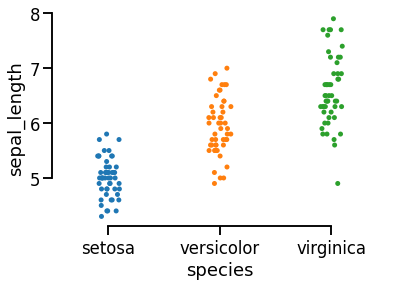

In [4]:
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True)
sns.despine(trim=5)

In [5]:
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

### Model

In [6]:
with pm.Model() as model_0:

  α = pm.Normal('α', mu=0, sd=10)
  β = pm.Normal('β', mu=0, sd=10)

  μ = α + pm.math.dot(x_c, β)
  
  θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
  bd = pm.Deterministic('bd', -α/β)
  yl = pm.Bernoulli('yl', p=θ, observed=y_0)
  trace_0 = pm.sample(1000)

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


### Plots

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f4a496150>,
      dtype=object)

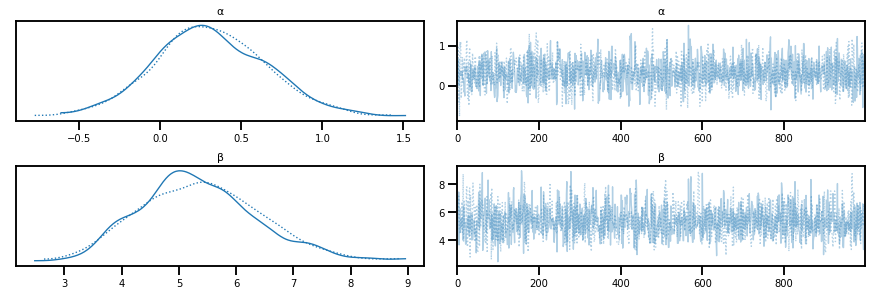

In [7]:
az.plot_trace(trace_0, var_names=['α', 'β'])

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


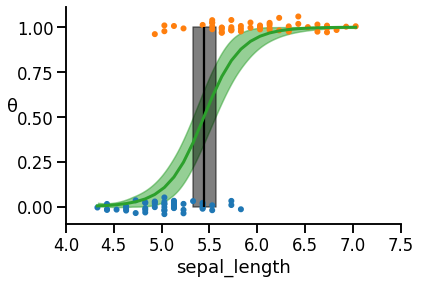

In [8]:
# extract probability that xbelong to class 1
theta = trace_0['θ'].mean(axis=0)

# use idx to sort x values
idx = np.argsort(x_c)

# Plot logistic function
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)

# Show HDI around logistic function
az.plot_hpd(x_c, trace_0['θ'], color='C2')

# Decision boundary
plt.vlines(trace_0['bd'].mean(), 0, 1, color='k')

# Confidence interval around the decision boundary
bd_hdi = az.hdi(trace_0['bd'])
plt.fill_betweenx([0, 1], bd_hdi[0], bd_hdi[1], color='k', alpha=0.5)

# Data points
plt.scatter(x_c, np.random.normal(y_0, 0.02), marker='.', color=[f'C{x}' for x in y_0]);

plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)

# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1));

sns.despine()

# Exercise 1
*Using the logistic regression example, try to solve the same problem using a simple linear regression model, as we saw in chapter 3. How useful is linear regression compared to logistic regression? Can the result be interpreted as a probability?*

*Tip: check whether the values of $y$ are restricted to the interval [0,1].*

# Exercise 2
Take the robust logistic regression and, using the code from the chapter, make it robust to outliers.

# Exercie 3
Using the logistic regression example, train the model on a sub-sample of the iris dataset and try to predict the class of the remaining data.